<a href="https://colab.research.google.com/github/wisamabdullah85/Machine-Learning-BitCoin/blob/main/RF_With_OneHotEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# قراءة الداتا سيت
#data1 = pd.read_csv('')  # غير المسار حسب مكان الداتا سيت الخاص بك
data = pd.read_csv('/content/datasetbcfinalmiss.csv')

In [ ]:
data['Last Price'].fillna(0, inplace = True)
data['Size'].fillna(0, inplace = True)

In [ ]:
print(data.isnull().sum())

Last Price        0
Open Price        0
Max               0
Min               0
Size              0
Change Persent    0
Class             0
dtype: int64


In [ ]:
# تطبيق الترميز الواحد الساخن على عمود 'Class'
encoder = OneHotEncoder(sparse=False)
class_encoded = encoder.fit_transform(data[['Class']])
class_encoded_df = pd.DataFrame(class_encoded, columns=encoder.get_feature_names_out(['Class']))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# دمج الداتا سيت المُشفر مع الداتا سيت الأصلي (بدون 'Class')
data_encoded = pd.concat([data.drop('Class', axis=1), class_encoded_df], axis=1)

In [ ]:
# تقسيم الداتا سيت إلى مجموعات التدريب والاختبار
X = data_encoded.drop(columns=encoder.get_feature_names_out(['Class']))  # استبعاد ميزات الفئة المشفرة
y = data['Class']  # المتغير الهدف
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# تدريب نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=72)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=72)

In [ ]:
# التنبؤ باستخدام مجموعة الاختبار
y_pred = rf_model.predict(X_test)

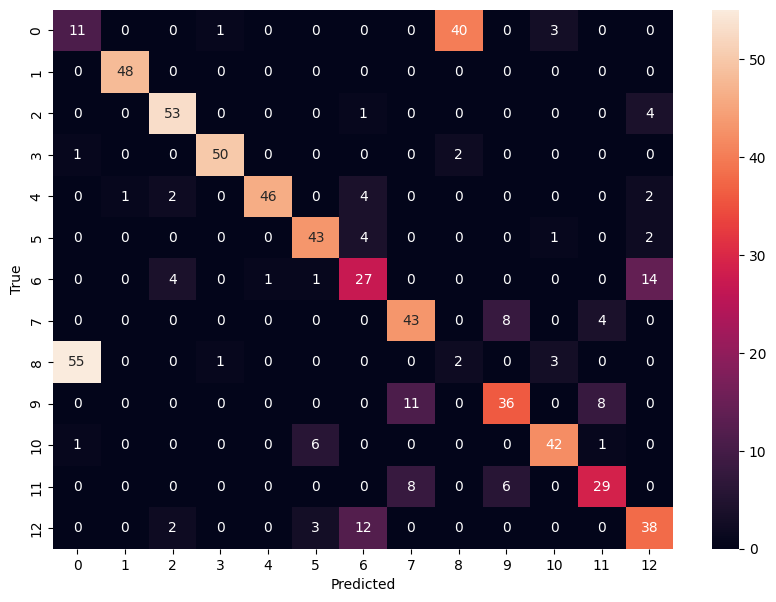

In [ ]:
# حساب وعرض مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6832116788321168
